### Étape 1 : Chargement et exploration des données

In [1]:
#a- chargement 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#b-explorartion
df = pd.read_csv('AmesHousing.csv')
#df
print(df[['SalePrice', 'Gr Liv Area', 'Lot Area']].describe())

#Objectif : Observer les statistiques de base, détecter des valeurs extrêmes visuellement.

           SalePrice  Gr Liv Area       Lot Area
count    2930.000000  2930.000000    2930.000000
mean   180796.060068  1499.690444   10147.921843
std     79886.692357   505.508887    7880.017759
min     12789.000000   334.000000    1300.000000
25%    129500.000000  1126.000000    7440.250000
50%    160000.000000  1442.000000    9436.500000
75%    213500.000000  1742.750000   11555.250000
max    755000.000000  5642.000000  215245.000000


### Étape 2 : Détection visuelle des valeurs aberrantes

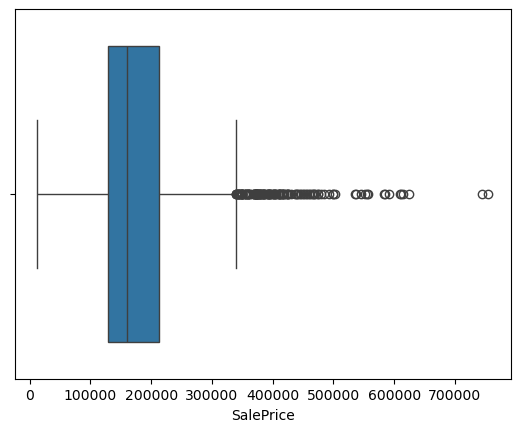

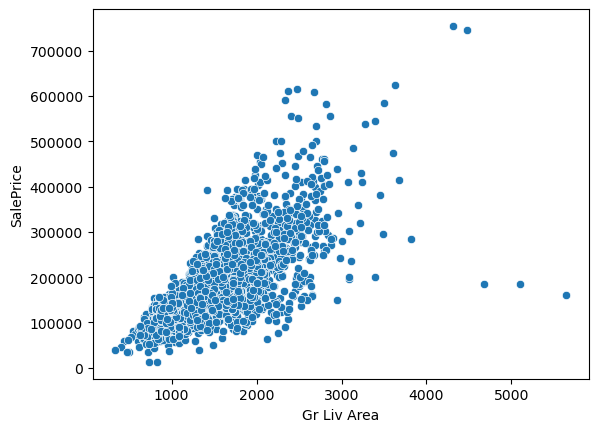

In [11]:
sns.boxplot(x=df['SalePrice'])
plt.show()

sns.scatterplot(x=df['Gr Liv Area'], y=df['SalePrice'])
plt.show()


###  Étape 3 : Méthodes de détection automatique

In [12]:
# 1- Méthode IQR (Interquartile Range)

Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['SalePrice'] < lower_bound) | (df['SalePrice'] > upper_bound)]


### Étape 4 : Effet des valeurs aberrantes

In [13]:
# Avant suppression :

print(df['SalePrice'].mean(), df['SalePrice'].median())

180796.0600682594 160000.0


In [14]:
#Après suppression :

df_cleaned = df[(df['SalePrice'] >= lower_bound) & (df['SalePrice'] <= upper_bound)]
print(df_cleaned['SalePrice'].mean(), df_cleaned['SalePrice'].median())

169115.50017901897 157500.0


### Étape 5 : Application pratique (régression simple)

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Entraînement du modèle sur toutes les données
X = df[["Gr Liv Area"]]
y = df["SalePrice"]

model_all = LinearRegression()
model_all.fit(X, y)

y_pred_all = model_all.predict(X)
mse_all = mean_squared_error(y, y_pred_all)

print("MSE AVANT suppression des outliers :", mse_all)


MSE AVANT suppression des outliers : 3192801087.3860455


#### Détecter et supprimer les outliers avec la méthode IQR

In [3]:
# Méthode IQR sur 'Gr Liv Area'
Q1 = df["Gr Liv Area"].quantile(0.25)
Q3 = df["Gr Liv Area"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les données sans outliers
df_clean = df[(df["Gr Liv Area"] >= lower_bound) & (df["Gr Liv Area"] <= upper_bound)]

#### Regarder les données après suppression des outliers

In [4]:
X_clean = df_clean[["Gr Liv Area"]]
y_clean = df_clean["SalePrice"]

model_clean = LinearRegression()
model_clean.fit(X_clean, y_clean)

y_pred_clean = model_clean.predict(X_clean)
mse_clean = mean_squared_error(y_clean, y_pred_clean)

print("MSE APRÈS suppression des outliers :", mse_clean)

MSE APRÈS suppression des outliers : 2758298735.087982


#### Comparer les performances

In [5]:
print(f"Erreur quadratique moyenne AVANT : {mse_all:.2f}")
print(f"Erreur quadratique moyenne APRÈS : {mse_clean:.2f}")

Erreur quadratique moyenne AVANT : 3192801087.39
Erreur quadratique moyenne APRÈS : 2758298735.09


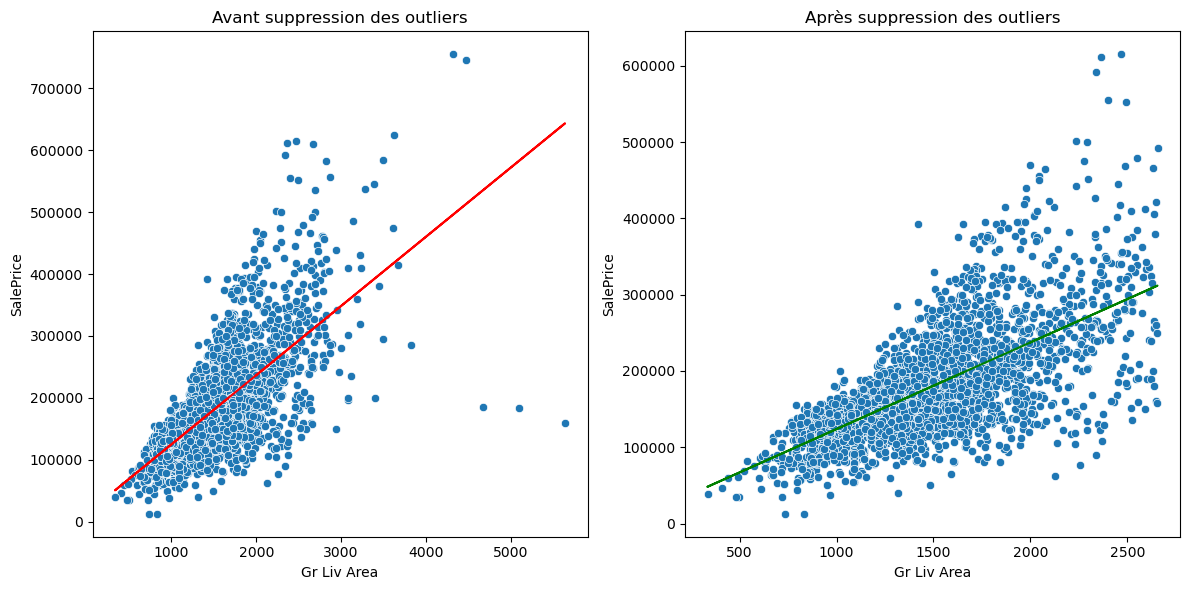

In [6]:
plt.figure(figsize=(12,6))

# AVANT
plt.subplot(1, 2, 1)
sns.scatterplot(x="Gr Liv Area", y="SalePrice", data=df)
plt.plot(df["Gr Liv Area"], y_pred_all, color='red')
plt.title("Avant suppression des outliers")

# APRÈS
plt.subplot(1, 2, 2)
sns.scatterplot(x="Gr Liv Area", y="SalePrice", data=df_clean)
plt.plot(df_clean["Gr Liv Area"], y_pred_clean, color='green')
plt.title("Après suppression des outliers")

plt.tight_layout()
plt.show()